In [259]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
master = pd.read_csv("data/Master.csv")
batting = pd.read_csv("data/Batting.csv")
salaries = pd.read_csv("data/Salaries.csv")
positions = pd.read_csv("data/Appearances.csv")
pitching = pd.read_csv("data/Pitching.csv")

In [4]:
part_master = master[["playerID", "nameFirst", "nameLast"]]
part_batting = batting[["playerID", "yearID", "teamID", "lgID", "G", "AB", "H", "BB", "HBP", "SF"]]
part_salaries = salaries[["playerID", "yearID", "teamID", "salary"]]
part_positions = positions[["playerID", "yearID", "teamID", "GS", "G_p", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of", "G_dh"]]
part_pitching = pitching[["playerID", "yearID", "teamID", "W", "L", "GS", "ERA"]]

In [5]:
batting_2004 = part_batting[part_batting["yearID"] == 2004]
salaries_2004 = part_salaries[part_salaries["yearID"] == 2004]
positions_2004 = part_positions[part_positions["yearID"] == 2004]
pitching_2004 = part_pitching[part_pitching["yearID"] == 2004]

In [6]:
battpitch_2004 = pd.merge(batting_2004, pitching_2004, how="outer", on=("playerID", "teamID"))

In [7]:
battpitchpos_2004 = pd.merge(battpitch_2004, positions_2004, how="outer", on=("playerID", "teamID"))

In [8]:
battpitchpossal_2004 = pd.merge(battpitchpos_2004, salaries_2004, how="outer", on=("playerID", "teamID"))

In [10]:
mlb_2004 = pd.merge(battpitchpossal_2004, part_master, how="inner", on="playerID")

In [14]:
mlb_2004["OBP"] = (mlb_2004.H + mlb_2004.BB + mlb_2004.HBP) / (mlb_2004.AB + mlb_2004.BB + mlb_2004.HBP + mlb_2004.SF)

In [199]:
mlb_2004 = mlb_2004[mlb_2004["OBP"] > 0]

In [200]:
OBP_2004 = mlb_2004.OBP

In [202]:
avg_obp_2004 = OBP_2004.mean()

In [203]:
avg_obp_2004

0.30165887505942879

In [204]:
stdev_obp_2004 = OBP_2004.std()

In [205]:
mlb_2004["OBP_std"] = (mlb_2004.OBP - avg_obp_2004) / stdev_obp_2004

In [206]:
avg_sal_2004 = mlb_2004.salary.mean()
stdev_sal_2004 = mlb_2004.salary.std()

In [207]:
avg_sal_2004

2789257.811700183

In [208]:
mlb_2004["salary_std"] = (mlb_2004.salary - avg_sal_2004) / stdev_sal_2004

In [209]:
mlb_2004["OBP_Sal"] = mlb_2004.OBP_std - mlb_2004.salary_std

In [258]:
mlb_2004.sort("OBP_Sal", ascending=False).head(10)

,playerID,yearID_x,teamID,lgID,G,AB,H,BB,HBP,SF,...,G_of,G_dh,yearID_y,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
258,cottsne01,2004,CHA,AL,56,1,1,0,0,0,...,0,0,2004,301000,Neal,Cotts,1.000000,6.727282,-0.656621,7.383903
146,broweji01,2004,SFN,NL,89,2,1,1,0,0,...,0,0,2004,662500,Jim,Brower,0.666667,3.516205,-0.561225,4.077430
352,eischjo01,2004,MON,NL,22,3,2,0,0,0,...,0,0,2004,1300000,Joey,Eischen,0.666667,3.516205,-0.392997,3.909202
1207,torcato01,2004,SFN,NL,13,9,5,1,1,1,...,0,0,2004,302000,Tony,Torcato,0.583333,2.713436,-0.656357,3.369792
97,bentzch01,2004,MON,NL,36,2,1,0,0,0,...,0,0,2004,300000,Chad,Bentz,0.500000,1.910666,-0.656884,2.567551
675,knottga01,2004,DET,AL,36,3,1,1,0,0,...,0,0,2004,316000,Gary,Knotts,0.500000,1.910666,-0.652662,2.563328
34,ankieri01,2004,SLN,NL,5,1,0,1,0,0,...,0,0,2004,320000,Rick,Ankiel,0.500000,1.910666,-0.651607,2.562273
922,olmedra01,2004,CIN,NL,8,1,0,1,0,0,...,0,0,2004,322000,Ray,Olmedo,0.500000,1.910666,-0.651079,2.561745
1131,simonja01,2004,SLN,NL,15,2,1,0,0,0,...,1,0,2004,350000,Jason,Simontacchi,0.500000,1.910666,-0.643690,2.554356
457,gipsoch01,2004,TBA,AL,5,4,2,0,0,0,...,2,0,2004,350000,Charles,Gipson,0.500000,1.910666,-0.643690,2.554356


At this point, I have a nice dataframe called mlb_2004 that has batting, pitching, appearance, and salary stats from the 2004 MLB season. I've also added in: OBP (on base percentage), OBP_std (how many standard deviations above or below the mean OBP that player is), salary_std (how many standard deviations above or below the mean salary that player is), OBP_Sal (OBP_std minus salary_std).

This last number can help compare players based on their OBP relative to the average along with their salary relative to the average.

In [214]:
mlb_2004_pitchers = mlb_2004[mlb_2004["G_p"] > 0]

In [215]:
mlb_2004_pitchers = mlb_2004_pitchers[mlb_2004_pitchers.OBP.notnull()]

In [216]:
mlb_2014_pitchers[mlb_2014_pitchers["lgID"] == "NL"].sort("W", ascending=False).head(20)

,playerID,yearID_x,teamID,lgID,G,AB,H,BB,HBP,SF,...,G_of,G_dh,yearID_y,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
933,oswalro01,2004,HOU,NL,36,71,10,3,1,1,...,0,0,2004,3250000,Roy,Oswalt,0.184211,-0.416638,0.215205,-0.631843
949,pavanca01,2004,FLO,NL,31,68,13,1,1,0,...,0,0,2004,3800000,Carl,Pavano,0.214286,-0.215701,0.370945,-0.586647
233,clemero02,2004,HOU,NL,33,72,12,3,0,0,...,0,0,2004,5000000,Roger,Clemens,0.200000,-0.311146,0.710742,-1.021889
1109,schmija01,2004,SFN,NL,32,66,9,4,1,0,...,0,0,2004,7937500,Jason,Schmidt,0.197183,-0.329967,1.542537,-1.872504
1172,suppaje01,2004,SLN,NL,31,57,4,1,0,0,...,0,0,2004,1000000,Jeff,Suppan,0.086207,-1.071415,-0.421914,-0.649501
1339,zambrca01,2004,CHN,NL,31,70,16,3,0,1,...,0,0,2004,450000,Carlos,Zambrano,0.256757,0.068054,-0.577655,0.645709
768,maddugr01,2004,CHN,NL,34,69,11,1,0,0,...,0,0,2004,6000000,Greg,Maddux,0.171429,-0.502036,0.993907,-1.495943
639,johnsra05,2004,ARI,NL,35,80,10,4,0,0,...,0,0,2004,16000000,Randy,Johnson,0.166667,-0.533851,3.825548,-4.359400
700,lawrebr02,2004,SDN,NL,36,62,6,3,0,0,...,0,0,2004,925000,Brian,Lawrence,0.138462,-0.722294,-0.443152,-0.279143
780,marquja01,2004,SLN,NL,35,72,21,1,0,1,...,0,0,2004,525000,Jason,Marquis,0.297297,0.338911,-0.556417,0.895329


Johan Santana from Minnesota is a good candidate for starting pitcher. His record in 2004 was 20-6, with a 2.61 ERA, so he's an excellent pitcher. But he's also a decent hitter. His OBP that year was .375, which is not quite 1 full standard deviation above the mean (0.858 to be exact), and his salary was just below the mean (1.6 million to the avg of 2.8 million). So his OBP_Sal is 1.11, which is much better than any of the other pitchers around him based on total wins. Unfortunately, he's an AL pitcher, so he only had 8 ABs, which means his OBP might be an anomoly. So we'll restrict this to NL pitchers, for the sake of accuracy on OBP. With that restriction, the best pitcher is either Carlos Zambrano of the Cubs (16-8, 2.75 ERA, .257 OBP, Salary 450,000, 70 ABs, .646 OBP_Sal) or Jason Marquis of the Cardinals (15-7, 3.71 ERA, .297 OBP, Salary 525,000, 72 ABs, .895 OBP_Sal). Since this homework is supposed to focus on OBP, and since I'm a Cardinals fan, I'll go with Marquis on this one.

In [217]:
mlb_2004_catch = mlb_2004[mlb_2004["G_c"] > 0].sort("OBP_Sal", ascending=False)

In [218]:
mlb_2004_catch = mlb_2004_catch[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_c", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [219]:
mlb_2004_catch.head(10)

,playerID,teamID,lgID,G,AB,H,BB,G_c,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
60,bardjo01,CLE,AL,7,19,8,3,7,316700,Josh,Bard,0.478261,1.701248,-0.652477,2.353726
372,estrajo01,ATL,NL,134,462,145,39,133,312500,Johnny,Estrada,0.377907,0.734516,-0.653586,1.388102
1166,stinnke01,KCA,AL,20,59,18,5,20,500000,Kelly,Stinnett,0.378788,0.743002,-0.604107,1.347109
804,mauerjo01,MIN,AL,35,107,33,11,32,300000,Joe,Mauer,0.368852,0.647291,-0.656884,1.304176
793,martivi01,CLE,AL,141,520,147,60,132,304500,Victor,Martinez,0.358714,0.549626,-0.655697,1.205323
849,mirabdo01,BOS,AL,59,160,45,19,53,825000,Doug,Mirabelli,0.368132,0.640350,-0.518343,1.158693
617,ingebr01,DET,AL,131,408,117,32,39,340000,Brandon,Inge,0.340000,0.369349,-0.646329,1.015678
998,prattto02,PHI,NL,45,128,33,18,43,875000,Todd,Pratt,0.351351,0.478699,-0.505149,0.983848
1304,wilsocr03,PIT,NL,155,561,148,50,4,1150000,Craig,Wilson,0.354037,0.504573,-0.432580,0.937153
807,maynebr01,ARI,NL,36,94,24,13,30,800000,Brent,Mayne,0.342593,0.394324,-0.524941,0.919265


At catcher, I'm going to take Johnny Estrada of the Braves, with an OBP of .378, a salary of 312,500, and an OBP_Sal of 1.388 over 462 ABs. (For the sake of space, all of the following position player dataframes will only be displayed to 5 or 10 rows instead of 20.)

In [220]:
mlb_2004_firstb = mlb_2004[mlb_2004["G_1b"] > 0].sort("OBP_Sal", ascending=False)

In [221]:
mlb_2004_firstb = mlb_2004_firstb[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_1b", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [222]:
mlb_2004_firstb.head()

,playerID,teamID,lgID,G,AB,H,BB,G_1b,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
526,hafnetr01,CLE,AL,140,482,150,68,11,316300,Travis,Hafner,0.410122,1.044852,-0.652583,1.697435
541,hanseda01,SEA,AL,57,78,22,18,7,750000,Dave,Hansen,0.412371,1.066517,-0.538135,1.604652
1144,snowjt01,SFN,NL,107,346,113,58,100,1500000,J. T.,Snow,0.428916,1.225894,-0.340219,1.566113
219,choihe01,FLO,NL,95,281,76,52,89,310000,Hee-Seop,Choi,0.387574,0.827640,-0.654246,1.481886
935,overbly01,MIL,NL,159,579,174,81,158,326000,Lyle,Overbay,0.384731,0.800249,-0.650023,1.450272


J.T. Snow of SF gets the nod at first base, since the players above him based on OBP_Sal didn't play enough games at that position (I'm using 100 games at the position as a minimum). Snow had an OBP of .429 and a salary of only 1.5 million for an OBP_Sal of 1.566.

In [223]:
mlb_2004_secb = mlb_2004[mlb_2004["G_2b"] > 0].sort("OBP_Sal", ascending=False)
mlb_2004_secb = mlb_2004_secb[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_2b", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [228]:
mlb_2004_secb.head()

,playerID,teamID,lgID,G,AB,H,BB,G_2b,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
195,carroja01,MON,NL,102,218,63,32,51,310000,Jamey,Carroll,0.377953,0.734957,-0.654246,1.389202
452,gilesma01,ATL,NL,102,379,118,36,97,430000,Marcus,Giles,0.378190,0.737245,-0.622579,1.359824
420,freelry01,CIN,NL,143,505,140,67,15,320000,Ryan,Freel,0.375000,0.706512,-0.651607,1.358119
82,bellhma01,BOS,AL,138,523,138,88,124,490000,Mark,Bellhorn,0.373183,0.689004,-0.606746,1.295750
20,alomaro01,ARI,NL,38,110,34,12,28,1000000,Roberto,Alomar,0.382114,0.775041,-0.472163,1.247204


My choice for second base is Mark Bellhorn from Boston (1.296 OBP_Sal, .373 OPB, 490,000 Salary). For comparison, the OBP leader at second base for 2004 had an OBP of .391 but a salary of 2.5 million. So Bellhorn is a steal.

In [229]:
mlb_2004_ss = mlb_2004[mlb_2004["G_ss"] > 0].sort("OBP_Sal", ascending=False)
mlb_2004_ss = mlb_2004_ss[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_ss", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [230]:
mlb_2004_ss.head(10)

,playerID,teamID,lgID,G,AB,H,BB,G_ss,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
922,olmedra01,CIN,NL,8,1,0,1,7,322000,Ray,Olmedo,0.500000,1.910666,-0.651079,2.561745
457,gipsoch01,TBA,AL,5,4,2,0,2,350000,Charles,Gipson,0.500000,1.910666,-0.643690,2.554356
764,machaan01,CIN,NL,17,56,15,10,17,300000,Anderson,Machado,0.378788,0.743002,-0.656884,1.399886
195,carroja01,MON,NL,102,218,63,32,10,310000,Jamey,Carroll,0.377953,0.734957,-0.654246,1.389202
82,bellhma01,BOS,AL,138,523,138,88,1,490000,Mark,Bellhorn,0.373183,0.689004,-0.606746,1.295750
859,morame01,BAL,AL,140,550,187,66,1,2333333,Melvin,Mora,0.419048,1.130833,-0.120313,1.251146
1335,younger01,TEX,AL,104,344,99,43,8,1000000,Eric,Young,0.376884,0.724665,-0.472163,1.196828
389,figgich01,ANA,AL,148,577,171,49,13,320000,Chone,Figgins,0.350318,0.468749,-0.651607,1.120356
1338,youngmi02,TEX,AL,160,690,216,44,158,450000,Michael,Young,0.353180,0.496315,-0.617301,1.113616
495,greenkh01,SDN,NL,139,484,132,53,136,300500,Khalil,Greene,0.349005,0.456100,-0.656752,1.112853


Had to go down the list to number 9 before finding a SS who played more than 100 games at the position. Michael Young from the Rangers will be making the start for my 2004 Moneyball team at SS, with a .353 OBP, Salary of 450,000, and an OBP_Sal of 1.114. The top OBP for a SS that year was .379, but his salary was 2.5 million.

In [231]:
mlb_2004_thirdb = mlb_2004[mlb_2004["G_3b"] > 0].sort("OBP_Sal", ascending=False)
mlb_2004_thirdb = mlb_2004_thirdb[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_3b", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [232]:
mlb_2004_thirdb.head(10)

,playerID,teamID,lgID,G,AB,H,BB,G_3b,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
541,hanseda01,SEA,AL,57,78,22,18,6,750000,Dave,Hansen,0.412371,1.066517,-0.538135,1.604652
195,carroja01,MON,NL,102,218,63,32,13,310000,Jamey,Carroll,0.377953,0.734957,-0.654246,1.389202
420,freelry01,CIN,NL,143,505,140,67,56,320000,Ryan,Freel,0.375000,0.706512,-0.651607,1.358119
82,bellhma01,BOS,AL,138,523,138,88,16,490000,Mark,Bellhorn,0.373183,0.689004,-0.606746,1.295750
859,morame01,BAL,AL,140,550,187,66,138,2333333,Melvin,Mora,0.419048,1.130833,-0.120313,1.251146
1335,younger01,TEX,AL,104,344,99,43,1,1000000,Eric,Young,0.376884,0.724665,-0.472163,1.196828
693,lambmi01,HOU,NL,112,278,80,31,57,352000,Mike,Lamb,0.355769,0.521258,-0.643162,1.164420
586,hillbo01,PIT,NL,126,233,62,20,25,315000,Bobby,Hill,0.353383,0.498275,-0.652926,1.151201
112,blakeca01,CLE,AL,152,587,159,68,152,352400,Casey,Blake,0.353823,0.502510,-0.643057,1.145567
389,figgich01,ANA,AL,148,577,171,49,92,320000,Chone,Figgins,0.350318,0.468749,-0.651607,1.120356


Melvin Mora of Baltimore will be playing third base (1.251 OBP_Sal, .419 OBP, 2.3 million salary). Mora happens to be the top third baseman for 2004 based on OBP (for players who regularly played that position).

In [233]:
mlb_2004_of = mlb_2004[mlb_2004["G_of"] > 0].sort("OBP_Sal", ascending=False)
mlb_2004_of = mlb_2004_of[["playerID", "teamID", "G", "AB", "G_lf", "G_cf", "G_rf", "G_of", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [234]:
mlb_2004_of.head(20)

,playerID,teamID,G,AB,G_lf,G_cf,G_rf,G_of,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
1131,simonja01,SLN,15,2,1,0,0,1,350000,Jason,Simontacchi,0.500000,1.910666,-0.643690,2.554356
457,gipsoch01,TBA,5,4,1,2,0,2,350000,Charles,Gipson,0.500000,1.910666,-0.643690,2.554356
852,mohrdu01,SFN,117,263,43,6,55,95,342500,Dustan,Mohr,0.393750,0.887135,-0.645669,1.532804
339,dunnad01,CIN,161,568,156,0,0,156,445000,Adam,Dunn,0.387665,0.828519,-0.618621,1.447140
226,clarkbr02,MIL,138,353,3,9,123,133,376000,Brady,Clark,0.385167,0.804458,-0.636829,1.441287
195,carroja01,MON,102,218,2,0,0,2,310000,Jamey,Carroll,0.377953,0.734957,-0.654246,1.389202
462,gloadro01,CHA,110,234,17,1,22,39,302000,Ross,Gload,0.374517,0.701863,-0.656357,1.358220
420,freelry01,CIN,143,505,12,42,46,89,320000,Ryan,Freel,0.375000,0.706512,-0.651607,1.358119
1177,sweenma01,COL,122,177,9,0,20,28,400000,Mark,Sweeney,0.376744,0.723314,-0.630496,1.353810
595,hollato01,CHN,57,148,4,0,32,36,1000000,Todd,Hollandsworth,0.391566,0.866099,-0.472163,1.338262


For the outfield, I'm picking the three players who played at least 100 games in the OF, and preferably had a majority of their games at one particular position (though OFers often can switch positions). At LF, Adam Dunn of Cincinnati fits the bill (156 games at LF, .388 OBP, Salary 445,000, 1.447 OBP_Sal). At CF, Aaron Rowand of the White Sox (126 games there, .361 OBP, Salary 340,000, 1.219 OBP_Sal). At RF, Brady Clark from Milwaukee (123 games, .385 OBP, Salary 376,000, 1.441 OBP_Sal). For comparison, the top 3 OFers by OBP were Barry Bonds (SF, with a ridiculous .609 OBP over 147 games, but an equally ridiculous salary of 18 million), Lance Berkman (HOU, .450 OBP, 6.5 million salary), and J.D. Drew (ATL, .436 OBP, 4.2 million salary). Since none of those three were a CFer (Berkman played there twice, Drew 8 times), we'll include Jim Edmonds (StL, .418 OBP, 9.3 million salary). We can see here the pretty big difference between those who are making under 500,000 and those who are making well above the league average of 2.5 million (or in the case of Bonds, well, well, well above it).

In [235]:
pitcher = {"name": "Jason Marquis (P) StL", "OBP": .297, "Salary": 525000}
catcher = {"name": "Johnny Estrada (C) ATL", "OBP": .378, "Salary": 312500}
first_base = {"name": "J.T. Snow (1B) SF", "OBP": .429, "Salary": 1500000}
sec_base = {"name": "Mark Bellhorn (2B) BOS", "OBP": .373, "Salary": 490000}
ss = {"name": "Michael Young (SS) TEX", "OBP": .353, "Salary": 450000}
third_base = {"name": "Melvin Mora (3B) BAL", "OBP": .419, "Salary": 2333333}
lf = {"name": "Adam Dunn (LF) CIN", "OBP": .388, "Salary": 445000}
cf = {"name": "Aaron Rowand (CF) CHW", "OBP": .361, "Salary": 340000}
rf = {"name": "Brady Clark (RF) MIL", "OBP": .385, "Salary": 376000}

In [236]:
moneyball_team = pd.DataFrame([pitcher, catcher, first_base, sec_base, ss, third_base, lf, cf, rf]).set_index(["name"])

In [251]:
moneyball_team

,OBP,Salary
name,,
Jason Marquis (P) StL,0.297,525000
Johnny Estrada (C) ATL,0.378,312500
J.T. Snow (1B) SF,0.429,1500000
Mark Bellhorn (2B) BOS,0.373,490000
Michael Young (SS) TEX,0.353,450000
Melvin Mora (3B) BAL,0.419,2333333
Adam Dunn (LF) CIN,0.388,445000
Aaron Rowand (CF) CHW,0.361,340000
Brady Clark (RF) MIL,0.385,376000


In [252]:
mb_team_avg_obp = moneyball_team.OBP.mean()
obp_ratio = (mb_team_avg_obp - avg_obp_2004) / avg_obp_2004

In [253]:
print(mb_team_avg_obp)
print(obp_ratio)

0.375888888889
0.246072699883


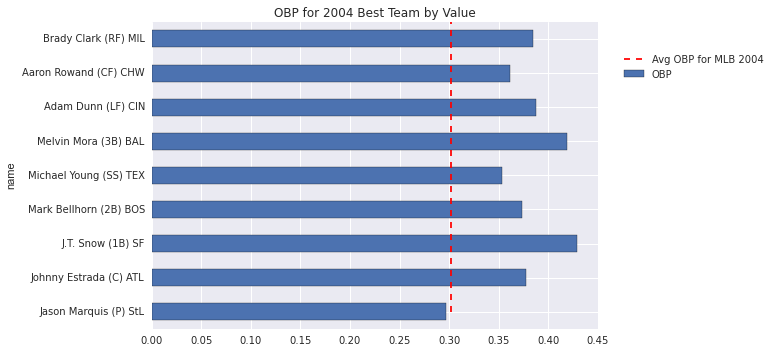

In [260]:
moneyball_team.OBP.plot(kind="barh", title="OBP for 2004 Best Team by Value")
plt.vlines(avg_obp_2004, ymin=0, ymax=100, color="red", linestyle="dashed", label="Avg OBP for MLB 2004")
plt.legend(loc=(1.05, 0.80))
plt.show()

My 2004 moneyball team has an average OBP of .376, which is almost 25% higher than the MLB average OBP for that year. The graph above shows the OBP for each player compared to the average OBP for all of MLB in 2004.

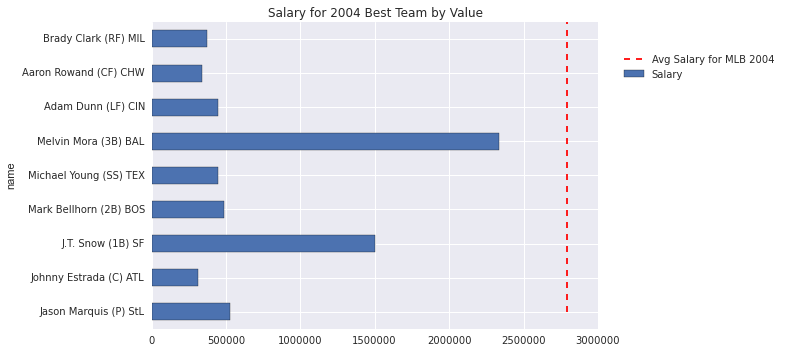

In [261]:
moneyball_team.Salary.plot(kind="barh", title="Salary for 2004 Best Team by Value")
plt.vlines(avg_sal_2004, ymin=0, ymax=100, color="red", linestyle="dashed", label="Avg Salary for MLB 2004")
plt.legend(loc=(1.05, 0.80))
plt.show()

Here we see the huge difference in salary for my 2004 moneyball team - no player makes even the average salary for that year (about 2.8 million). Only two players make over 1 million, and a third just barely clears 500,000. The average salary for my team is 752,426, which is 73% lower than the average for MLB that year. Which makes this team a bargain. Would they have made it to the playoffs that year? Who knows!

In [254]:
mb_team_avg_sal = moneyball_team.Salary.mean()
sal_ratio = (mb_team_avg_sal - avg_sal_2004) / avg_sal_2004
print(mb_team_avg_sal)
print(sal_ratio)

752425.888889
-0.730241541053
